In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
# 假設你的資料集是一個csv檔案，名為data.csv
data = pd.read_csv("cat_static (3).csv")

# 把三軸加速度的數據做為輸入x
x_data = data[["ax", "ay", "az"]].values

# 假設動作分類的名稱在一個欄位名為'action'
actions = data["action"].unique()
action_dict = {action: i for i, action in enumerate(actions)}
y_data = data["action"].map(action_dict).values

# 轉換資料形狀以符合LSTM模型的輸入需求，並將y_data進行one-hot編碼
x_data = np.reshape(x_data, (x_data.shape[0], 1, x_data.shape[1]))
y_data = to_categorical(y_data)

# 設計LSTM模型
# 設計LSTM模型
model = Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=256, return_sequences = True,
          input_shape=[x_data.shape[1], x_data.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.LSTM(units =50, return_sequences = True))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(units = 128))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_data.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 訓練模型
model.fit(
    x_data, y_data,
    epochs=40,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('lstm_model.tflite', 'wb').write(tfmodel)

Epoch 1/40
10/10 [==============================] - 8s 171ms/step - loss: 1.5939 - acc: 0.4222 - val_loss: 1.6643 - val_acc: 0.0000e+00
Epoch 2/40
10/10 [==============================] - 0s 38ms/step - loss: 1.5394 - acc: 0.5127 - val_loss: 1.7743 - val_acc: 0.0000e+00
Epoch 3/40
10/10 [==============================] - 0s 45ms/step - loss: 1.4138 - acc: 0.4889 - val_loss: 2.0647 - val_acc: 0.0000e+00
Epoch 4/40
10/10 [==============================] - 0s 50ms/step - loss: 1.2280 - acc: 0.5222 - val_loss: 2.7180 - val_acc: 0.0000e+00
Epoch 5/40
10/10 [==============================] - 0s 48ms/step - loss: 1.1071 - acc: 0.5603 - val_loss: 3.2490 - val_acc: 0.0000e+00
Epoch 6/40
10/10 [==============================] - 0s 39ms/step - loss: 1.0066 - acc: 0.5778 - val_loss: 4.1823 - val_acc: 0.0000e+00
Epoch 7/40
10/10 [==============================] - 0s 38ms/step - loss: 0.9254 - acc: 0.6333 - val_loss: 5.0546 - val_acc: 0.0000e+00
Epoch 8/40
10/10 [==============================] - 0s

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpzbebnydy\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpzbebnydy\assets


806032

In [15]:
x_data

array([[[ 0.020264,  0.405029, -0.927734]],

       [[ 0.014893,  0.407227, -0.924683]],

       [[ 0.016602,  0.407837, -0.924316]],

       ...,

       [[ 0.820557,  0.215576, -0.507202]],

       [[ 0.760376,  0.262939, -0.508179]],

       [[ 0.810913,  0.269165, -0.573853]]])

In [3]:
data = pd.read_csv("cat_static (3)_test.csv")

# 把三軸加速度的數據做為輸入x
new_data= data[["ax", "ay", "az"]].values

new_data = np.reshape(new_data, (new_data.shape[0], 1, new_data.shape[1]))

# 使用模型進行預測
predictions = model.predict(new_data)

# 將預測結果轉換為動作分類
predicted_actions = [actions[np.argmax(prediction)] for prediction in predictions]
print(f"The predicted action is: {predicted_actions}")
data
predicted_actions

2/2 [==============================] - 2s 5ms/step
The predicted action is: ['walking', 'seating', 'walking', 'lying', 'lying', 'walking', 'lying', 'walking', 'walking', 'walking', 'walking', 'walking', 'eating', 'eating', 'eating', 'seating', 'seating', 'seating', 'seating', 'lying', 'lying', 'lying', 'lying', 'eating', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'walking', 'walking', 'walking', 'walking', 'walking', 'walking', 'walking', 'eating', 'walking']


['walking',
 'seating',
 'walking',
 'lying',
 'lying',
 'walking',
 'lying',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'eating',
 'eating',
 'eating',
 'seating',
 'seating',
 'seating',
 'seating',
 'lying',
 'lying',
 'lying',
 'lying',
 'eating',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'lying',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'walking',
 'eating',
 'walking']

In [4]:
dd=data
dd.insert(loc=4,column='pred',value=predicted_actions)

In [5]:
from sklearn.metrics import accuracy_score

# 讀取CSV檔案
new_data = pd.read_csv("cat_static (3)_test.csv")

# 把三軸加速度的數據做為輸入x
x_new = new_data[["ax", "ay", "az"]].values

# 假設動作分類的名稱在一個欄位名為'action'
y_new = new_data["action"].map(action_dict).values

# 轉換數據形狀以符合模型的輸入需求
x_new = np.reshape(x_new, (x_new.shape[0], 1, x_new.shape[1]))

# 使用模型進行預測
predictions = model.predict(x_new)

# 將預測結果轉換為動作分類
predicted_actions = np.array([np.argmax(prediction) for prediction in predictions])

# 計算準確率
accuracy = accuracy_score(y_new, predicted_actions)

print(f"The accuracy of the model on the new data is: {accuracy}")
predicted_actions

2/2 [==============================] - 0s 3ms/step
The accuracy of the model on the new data is: 0.8372093023255814


array([3, 2, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3],
      dtype=int64)

In [5]:
dd

,ax,ay,az,action,pred
0,-0.463257,0.608643,0.487061,walking,walking
1,-0.017334,0.788574,0.414551,walking,walking
2,-0.459717,0.890137,0.217773,walking,seating
3,-0.011963,1.148315,-0.193970,walking,lying
4,0.518433,0.874023,-0.227539,walking,lying
5,-0.065430,0.976074,0.269653,walking,walking
6,0.808594,0.100952,0.618286,walking,lying
7,-0.424316,0.037476,1.321777,walking,walking
8,-0.469727,-0.686157,0.514893,walking,walking
9,-0.727417,-0.519775,0.323975,walking,walking


In [11]:
import pickle
import gzip
with gzip.GzipFile('./lstm.pgz', 'w') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
....

In [18]:
import pickle
import gzip

#讀取Model
with gzip.open('./lstm.pgz', 'r') as f:
    Model = pickle.load(f)
    p_data=np.array([[-0.537476,-0.696655,0.033936]])
    p_data=np.reshape(p_data, (p_data.shape[0], 1, p_data.shape[1]))
    predi=Model.predict(p_data)
    predicted_actions = np.array([np.argmax(pred) for pred in predi])
    print(predicted_actions)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-15 16:46:42         4487
metadata.json                                  2023-06-15 16:46:42           64
variables.h5                                   2023-06-15 16:46:42      9105008
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......var

In [6]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp59exkcg_\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp59exkcg_\assets


ConverterError: C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\saved_model\save.py:1267:0: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\saved_model\save.py:1267:0: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [6]:
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))

訓練集:  1.0
測試集:  0.9701492537313433


In [8]:
sns.lmplot(x="ax", y="ay", hue='action', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['lying', 'eating', 'seating','ping','walking'])
plt.show()

NameError: name 'df_test' is not defined

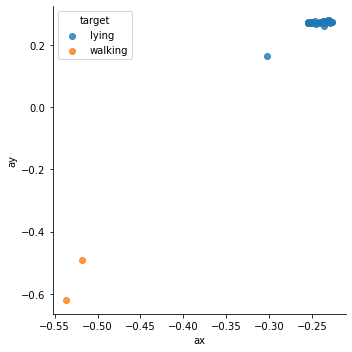

In [49]:
sns.lmplot(x="ax", y="ay", hue='Predict', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['lying', 'walking'])
plt.show()

In [40]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale
predicted_stock_price

NameError: name 'regressor' is not defined

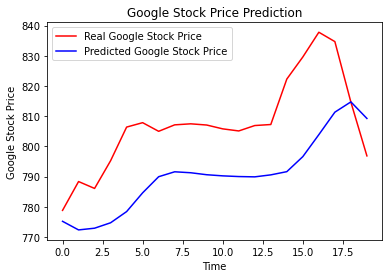

In [13]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()